<a href="https://colab.research.google.com/github/faisalnawazmir/Econometrics-ML_for_Finance/blob/main/Diagnosis_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diagnostic testing


 We will inspect the residuals of an APT-style regression of the excess return of Microsoft
shares, ’ermsoft’, on unexpected changes in a set of financial and macroeconomic variables, which
we have estimated above. 

In [20]:
import statsmodels.formula.api as smf
import pickle
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.compat import lzip

In [21]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [22]:
abspath=r'/gdrive/My Drive/data/'
with open(abspath+'macro.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [23]:
#file = r'/gdrive/My Drive/data/macro.xls'
#data= pd.read_excel(file)
data = data.dropna() # drop the missing values for some columns

In [ ]:
data.head()

,date,dspread,dcredit,dprod,rmsoft,rsandp,dmoney,inflation,term,dinflation,mustb3m,rterm,ermsoft,ersandp
2,1986-05-01,-0.20,7.5483,0.1196,8.183334,4.900851,-1.3,0.275862,1.38,0.459855,0.527500,0.32,7.655834,4.373351
3,1986-06-01,0.01,5.9758,-0.1891,-12.945833,1.401091,17.1,0.549452,1.40,0.273590,0.533333,0.02,-13.479167,0.867757
4,1986-07-01,0.07,5.7173,0.3137,-7.599084,-6.047514,10.6,0.000000,1.30,-0.549452,0.500000,-0.10,-8.099084,-6.547514
5,1986-08-01,0.18,6.9043,-0.0748,0.000000,6.877261,5.0,0.182482,1.48,0.182482,0.474167,0.18,-0.474167,6.403095
6,1986-09-01,-0.15,9.3754,0.1135,-0.881009,-8.931068,6.1,0.454753,2.10,0.272271,0.445833,0.62,-1.326843,-9.376901


##Testing for heteroscedasticity


The (original) Breusch-Pagan/Cook-Weisberg
test, which assumes that the regression disturbances are normally distributed; In order to obtain standard errors that are robust to heteroscedasticity, we select the argument
cov_type=’HC1’

In [ ]:
formula = 'ermsoft ~ ersandp + dprod + dcredit + \
dinflation + dmoney + dspread + rterm '
results = smf.ols(formula, data).fit(cov_type='HAC',cov_kwds={'maxlags':6,'use_correction':True})
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                ermsoft   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     24.93
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           6.73e-28
Time:                        10:56:34   Log-Likelihood:                -1328.3
No. Observations:                 383   AIC:                             2673.
Df Residuals:                     375   BIC:                             2704.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3260      0.503      2.638      0.0

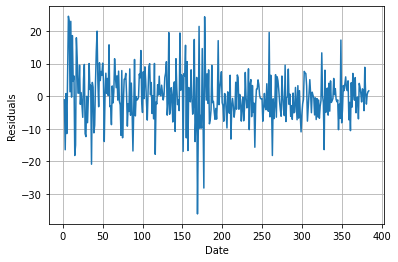

In [ ]:
plt.figure(1)
plt.plot(results.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
# breusch-pagan heteroskedasticity test
name = ['Lagrange multiplier statistic', 'p-value',
'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.1606601504201874),
 ('p-value', 0.8697526743786506),
 ('f-value', 0.44577025527121455),
 ('f p-value', 0.8729003404188317)]

In [ ]:
# Ho= homo or equal variance
#p-value<0.05, reject Ho,  conclude there hetro issue.  Here, the test suggests not to reject the null hypothesis of constant variance of the residuals.

#Using White’s modified standard error estimates


We can specify to estimate the regression with heteroscedasticity-robust standard errors in Python.
When we create the regression specification by the command smf.ols(formula, data), we usually
follow the function fit to produce the result instance. So far, we have only focused on the regression
model itself that specifies the dependent and independent variables.

In [ ]:
 formula = 'ermsoft ~ ersandp + dprod + dcredit + \
dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit(cov_type='HC1')
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                ermsoft   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     29.89
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           9.27e-33
Time:                        11:02:39   Log-Likelihood:                -1328.3
No. Observations:                 383   AIC:                             2673.
Df Residuals:                     375   BIC:                             2704.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3260      0.459      2.888      0.0

#The Newey-West procedure for estimating standard errors


In this subsection, we will apply the Newey-West procedure for estimating heteroscedasticity and
autocorrelation robust standard errors in Python. Similar to implementing robust standard error
adjustments by an argument in the function fit, the Newey-West procedure only requires us to
change the argument. To access this command, we simply type the argument cov_type=’HAC’,
cov_kwds=’maxlags’:6,’use_correction’:True . Of course, before implementing the robust standard
error adjustment, we are first required to define the dependent variable and the independent vari-
ables in the formula and to create the regression specification.
Note: 
 that if we were to specify zero in the ’maxlags’ argument, the Newey-West adjusted standard errors would be
the same as the robust standard errors introduced in the previous section.


In [ ]:
formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit(cov_type='HAC',
                                     cov_kwds={'maxlags':6,'use_correction':True})
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ermsoft   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     24.93
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           6.73e-28
Time:                        11:04:11   Log-Likelihood:                -1328.3
No. Observations:                 383   AIC:                             2673.
Df Residuals:                     375   BIC:                             2704.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3260      0.503      2.638      0.0

# Autocorrelation and dynamic models


In [ ]:
# durbin_watson
formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit()

residuals = results.resid
sms.durbin_watson(residuals)

2.097394050429992

In [ ]:

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
results1 = sms.acorr_breusch_godfrey(results, 10)
lzip(name, results1)


[('Lagrange multiplier statistic', 4.766591436782264),
 ('p-value', 0.9062145800242307),
 ('f-value', 0.4599820732479686),
 ('f p-value', 0.9150179981572865)]

Ho: No serial correlation. Conclusion: here we can not reject Ho, so there is no serious problem of autocorrelation.  

#Testing for non-normality


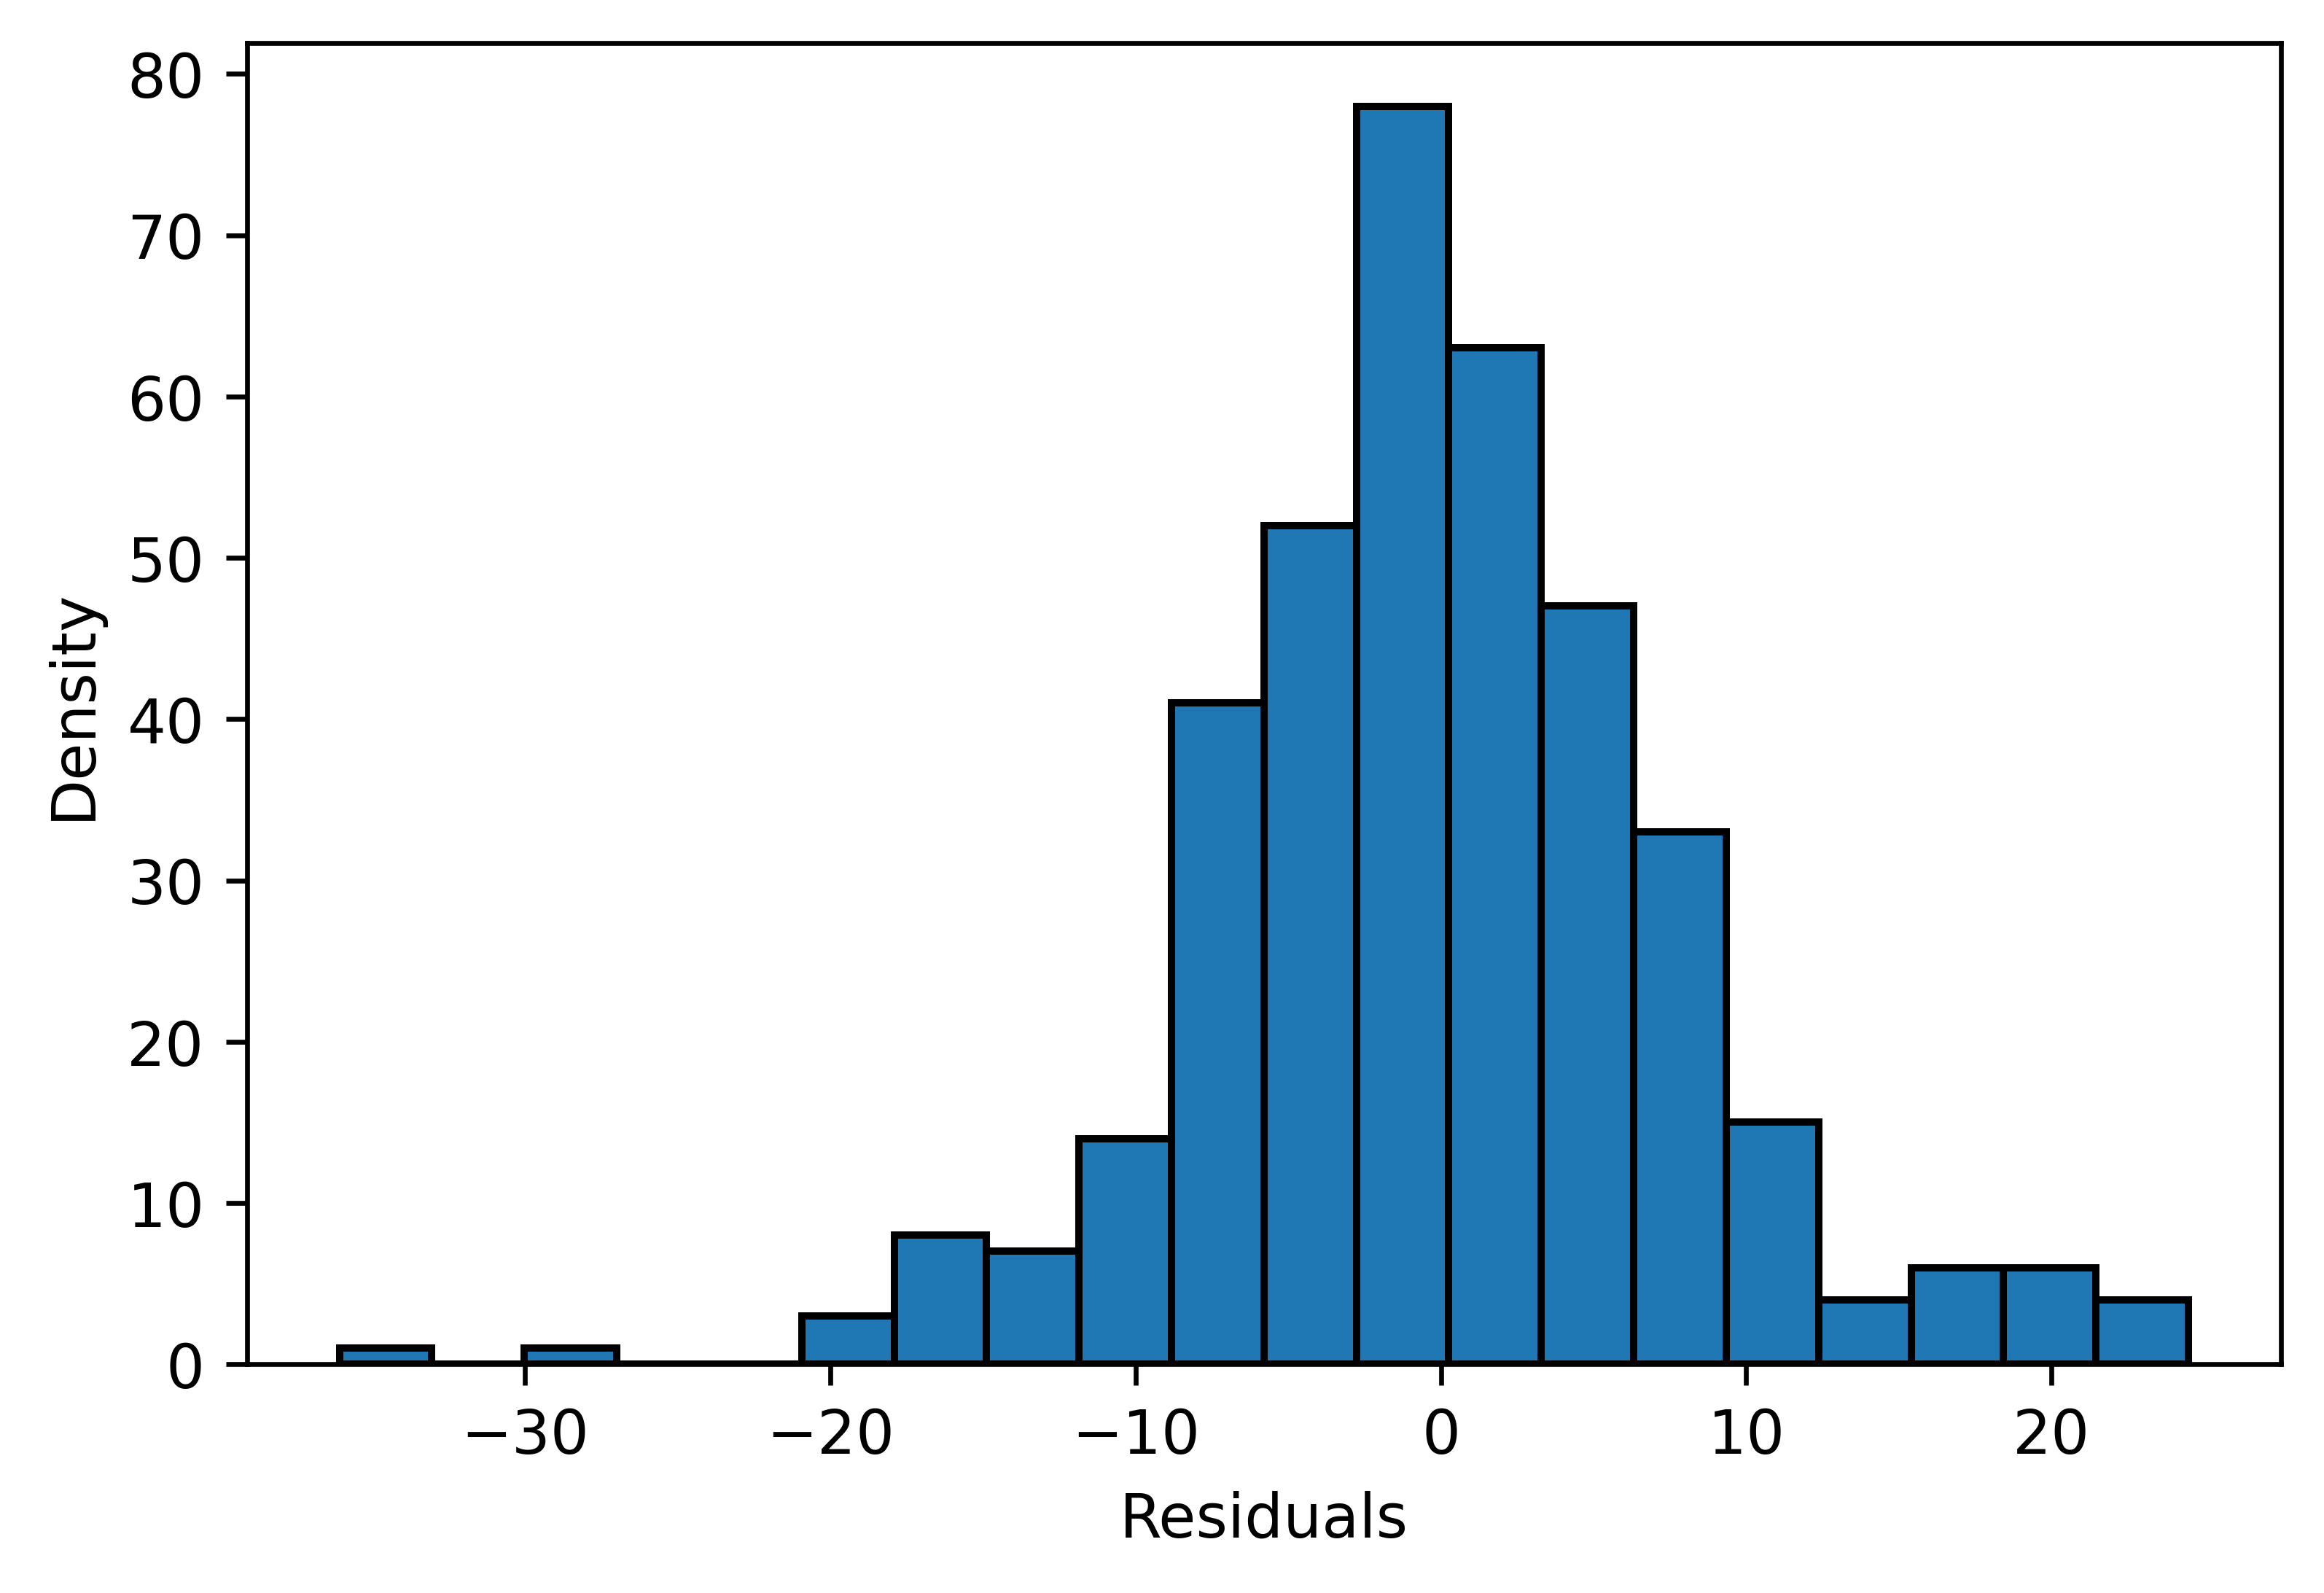

In [15]:
formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit()
residuals = results.resid

plt.figure(1, dpi=600)
plt.hist(residuals,20,edgecolor='black',linewidth=1.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


In [16]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals)
lzip(name, test)

[('Jarque-Bera', 63.50547267158979),
 ('Chi^2 two-tail prob.', 1.621667540991539e-14),
 ('Skew', -0.005612677479983353),
 ('Kurtosis', 4.994825605906652)]

Test for normality means H0= no normal,  if significant then normal


The probabilities that the skewness of the residuals resembles that of a normal distribution.
Additionally, it reports the adjusted χ2 value and p-value for the test that the residuals are overall
normally distributed, i.e., that both the kurtosis and the skewness are those of the normal distribution.
On the one hand, we find that the test for skewness does not reject the normality assumption of a zero
skewness. On the other hand, the test strongly rejects the assumption of a kurtosis equal to three.
The hypothesis that both kurtosis and skewness jointly resembles those of a normal distribution can be
strongly rejected.

What could cause this strong deviation from normality? Having another look at the histogram,
it appears to have been caused by a small number of very large negative residuals representing
monthly stock price falls of more than –25%. What does the non-normality of residuals imply for the
inferences we make about coefficient estimates? Generally speaking, it could mean that these infer-
ences could be wrong, although the sample is probably large enough that we need be less concerned
than we would with a smaller sample.


#Dummy variable construction and use
As we saw from the plot of the distribution above, the non-normality in the residuals from the Mi-
crosoft regression appears to have been caused by a small number of outliers in the sample. Such
events can be identified if they are present by plotting the actual values and the residuals of the
regression. We have already generated a data series containing the residuals of the Microsoft regres-
sion. Let us now create a series of the fitted values. For this, we use the function fittedvalues from the
results instance. We name the variable *y_fitted* and define that it will contain the linear prediction
for the Microsoft regression. The variable residuals is generated by the command _{results.resid}_.



In [5]:
data['datetime'] = pd.to_datetime(data['date'])
data= data.set_index('datetime')
data.drop(['date'], axis=1, inplace=True)
data.head()

,dspread,dcredit,dprod,rmsoft,rsandp,dmoney,inflation,term,dinflation,mustb3m,rterm,ermsoft,ersandp
datetime,,,,,,,,,,,,,
1986-05-01,-0.20,7.5483,0.1196,8.183334,4.900851,-1.3,0.275862,1.38,0.459855,0.527500,0.32,7.655834,4.373351
1986-06-01,0.01,5.9758,-0.1891,-12.945833,1.401091,17.1,0.549452,1.40,0.273590,0.533333,0.02,-13.479167,0.867757
1986-07-01,0.07,5.7173,0.3137,-7.599084,-6.047514,10.6,0.000000,1.30,-0.549452,0.500000,-0.10,-8.099084,-6.547514
1986-08-01,0.18,6.9043,-0.0748,0.000000,6.877261,5.0,0.182482,1.48,0.182482,0.474167,0.18,-0.474167,6.403095
1986-09-01,-0.15,9.3754,0.1135,-0.881009,-8.931068,6.1,0.454753,2.10,0.272271,0.445833,0.62,-1.326843,-9.376901


In [ ]:
# regression
formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit()
y_fitted = results.fittedvalues
residuals = results.resid


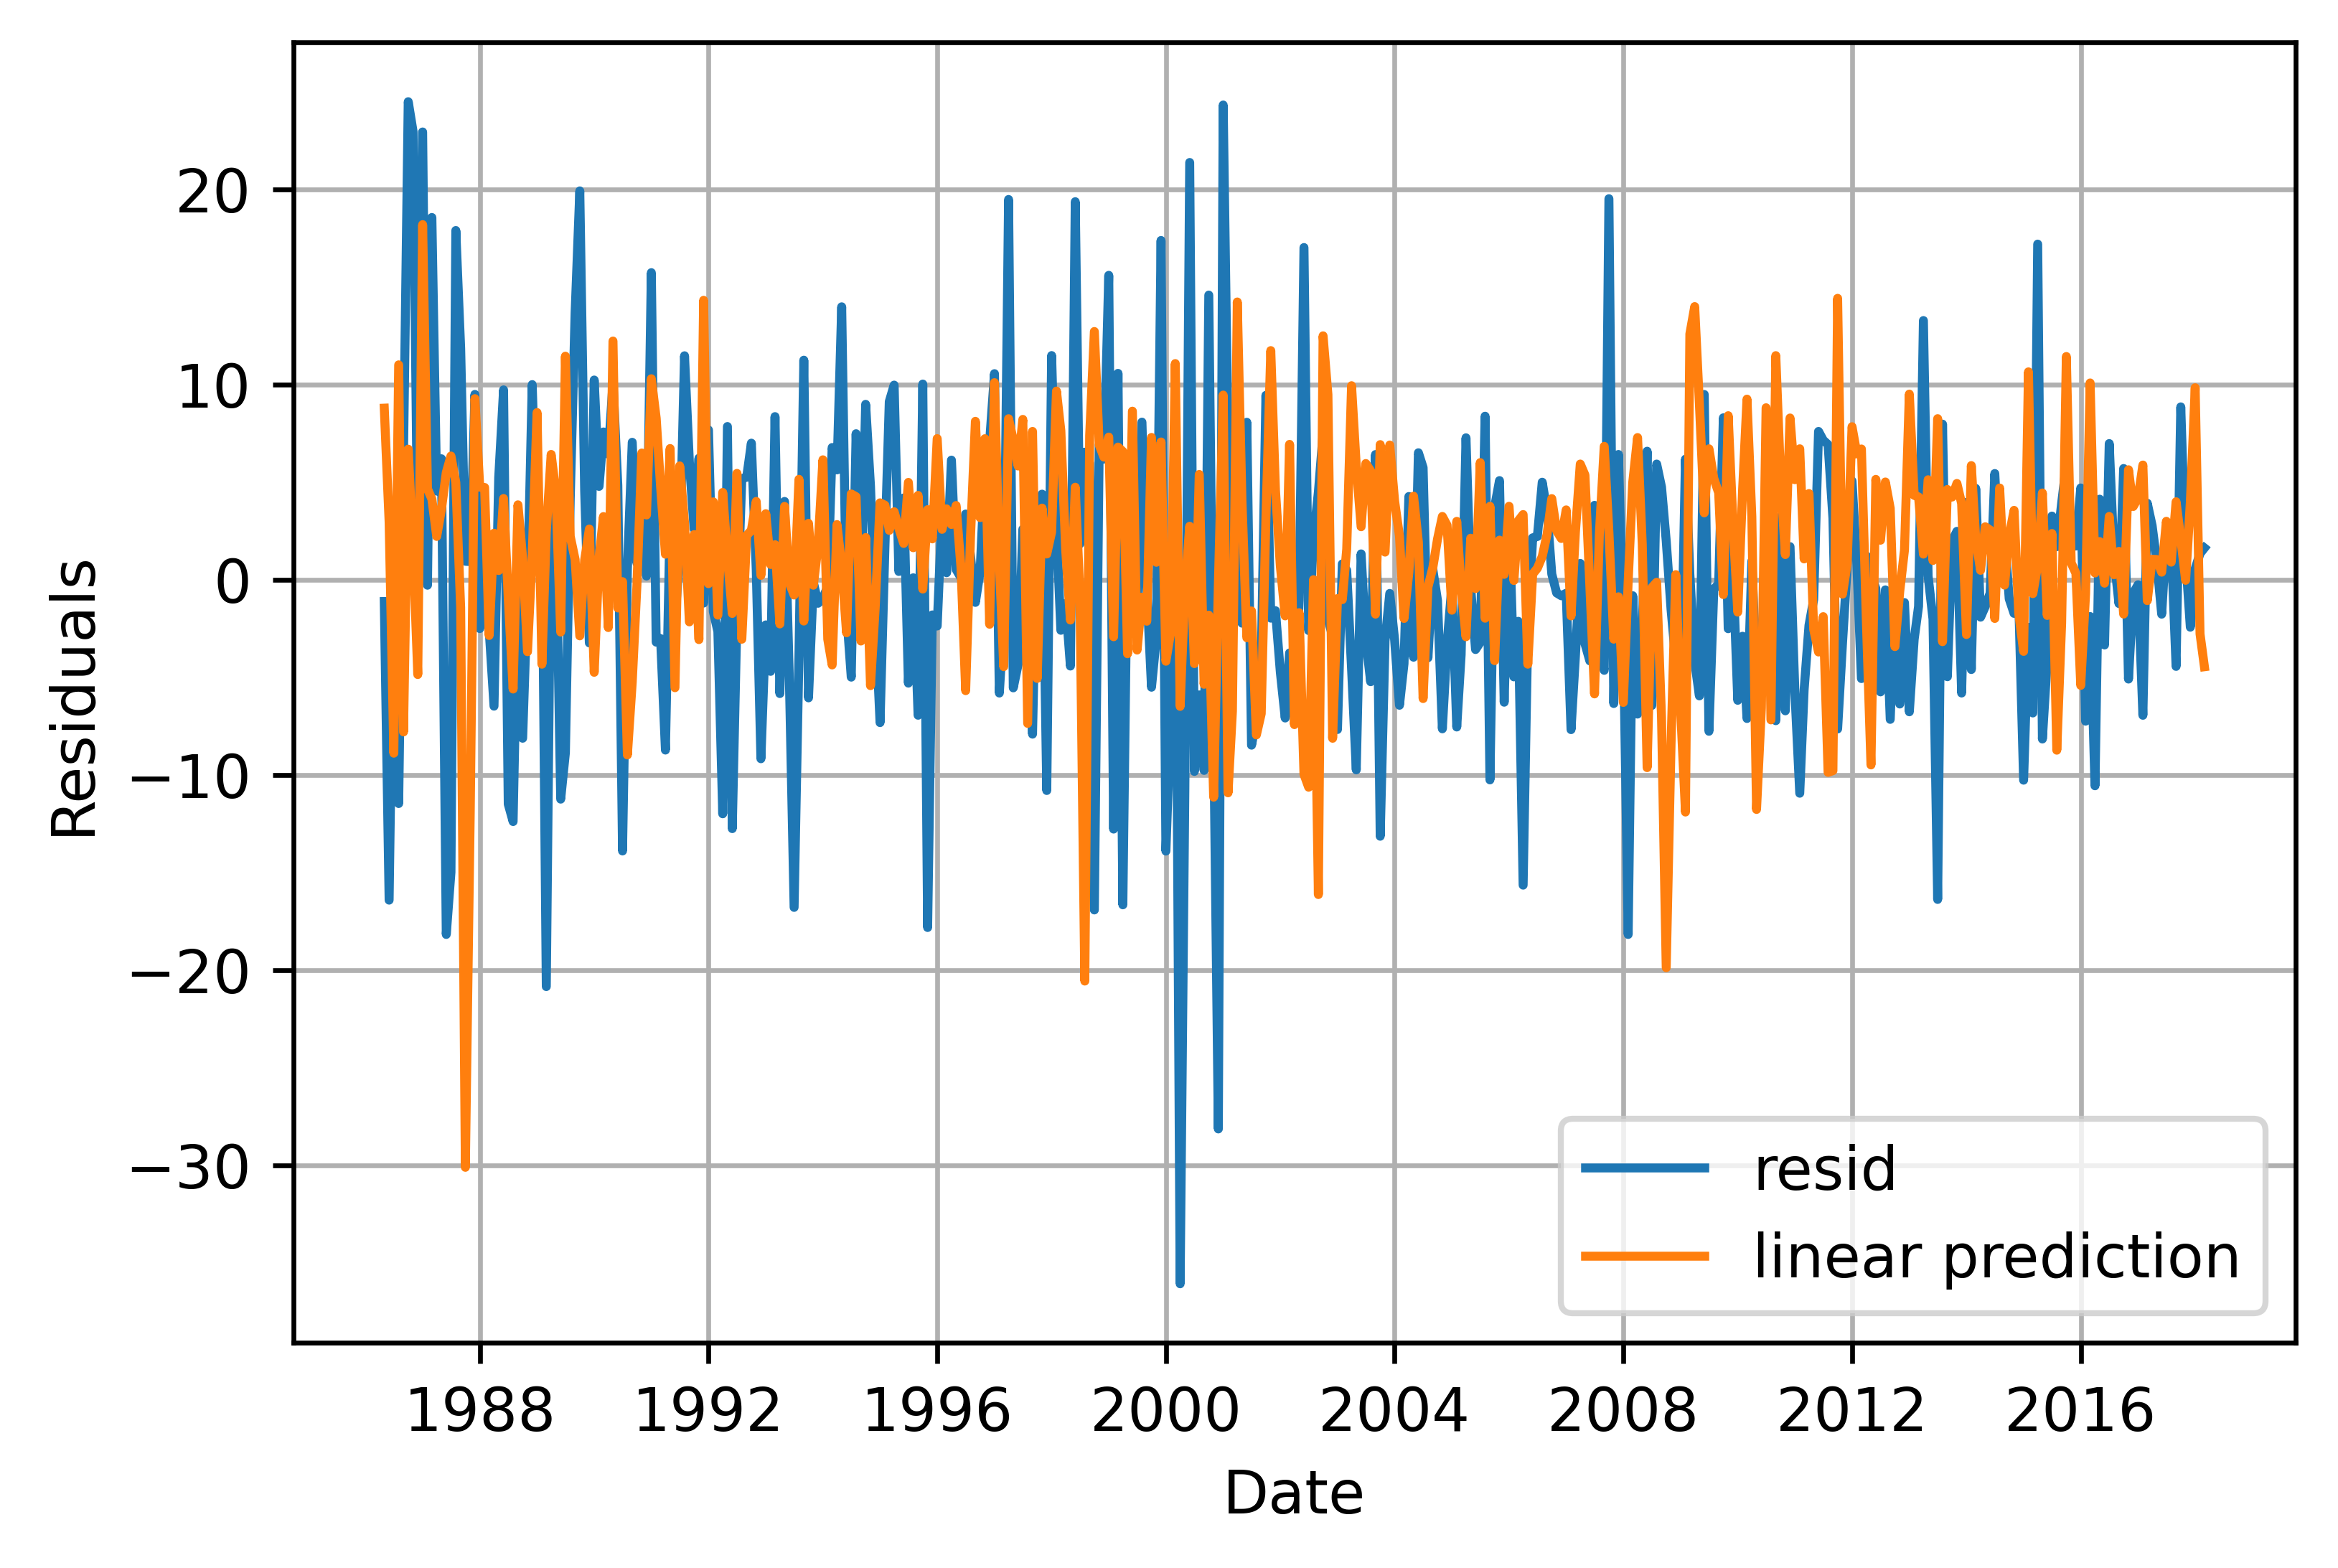

In [ ]:
plt.figure(1,dpi=600)
plt.plot(residuals, label='resid')
plt.plot(y_fitted, label='linear prediction')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

From the graph, it can be seen that there are several large (negative) outliers, but the largest all occur
in 2000. These large outliers correspond to months where the actual return was much smaller (i.e.,
more negative) than the model would have predicted, resulting in a large residual. Interestingly, the
residual in October 1987 is not quite so prominent because even though the stock price fell consider-
ably, the market index value fell as well, so that the stock price fall was at least in part predicted.
In order to identify the exact dates when the biggest outliers were realised, it is probably easiest


In [ ]:
residuals.nsmallest(2)

datetime
2000-04-01   -36.075347
2000-12-01   -28.143156
dtype: float64

It is evident that the two most extreme residuals were in April (–36.075) and December 2000 (–28.143).
One way of removing the (distorting) effect of big outliers in the data is by using dummy variables.
It would be tempting, but incorrect, to construct one dummy variable that takes the value 1 for both
April and December 2000. This would not have the desired effect of setting both residuals to zero.
Instead, to remove two outliers requires us to construct two separate dummy variables. In order to
create the April 2000 dummy first, we generate a series called ’APR00DUM’ into data DataFrame. To
precisely assign the value 1 on the date of April 2000 while keeping the rest of the series as zeros.


In [ ]:
data['APR00DUM'] = np.where(data.index == '2000-4-1', 1, 0)
data['DEC00DUM'] = np.where(data.index == '2000-12-1', 1, 0)

In [ ]:
data['APR00DUM'].sum()

1

In [ ]:
# regression
formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm + APR00DUM + DEC00DUM'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ermsoft   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     28.33
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.22e-37
Time:                        15:22:43   Log-Likelihood:                -1309.7
No. Observations:                 383   AIC:                             2639.
Df Residuals:                     373   BIC:                             2679.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4198      0.454      3.125      0.0

Note that the dummy variable parameters are both highly significant and take approximately the
values that the corresponding residuals would have taken if the dummy variables had not been
included in the model. By comparing the results with those of the regression above that excluded
the dummy variables, it can be seen that the coefficient estimates on the remaining variables change
quite a bit in this instance and the significances improve considerably. The inflation parameter is
now insignificant and the R2 value has risen from 0.34 to 0.41 because of the perfect fit of the dummy
variables to those two extreme outlying observations.

Note: As a rule of thumb, in a monthly sample with 381 observations, it is reasonable to
include, perhaps, two or three dummy variables for outliers, but more would probably be excessive.
Note the inexact correspondence between the values of the residuals and the values of the dummy variable parameters
because two dummies are being used together; had we included only one dummy, the value of the dummy variable
coefficient and that which the residual would have taken would be identical.




#Multicollinearity

In [17]:
data = data[['dprod','dcredit','dinflation','dmoney','dspread','rterm']]
data.corr()

,dprod,dcredit,dinflation,dmoney,dspread,rterm
dprod,1.000000,0.094273,-0.143551,-0.052514,-0.052756,-0.043751
dcredit,0.094273,1.000000,-0.024604,0.150165,0.062818,-0.004029
dinflation,-0.143551,-0.024604,1.000000,-0.093571,-0.227100,0.041606
dmoney,-0.052514,0.150165,-0.093571,1.000000,0.170699,0.003801
dspread,-0.052756,0.062818,-0.227100,0.170699,1.000000,-0.017622
rterm,-0.043751,-0.004029,0.041606,0.003801,-0.017622,1.000000



Do the results indicate any significant correlations between the independent variables? In this par-
ticular case, the largest observed correlations (in absolute value) are 0.17 between the money supply
and spread variables, and −0.23 between the spread and unexpected inflation. Both are probably
sufficiently small in absolute value that they can reasonably be ignored.


#The RESET test for functional form


In [18]:
from statsmodels.stats.outliers_influence import reset_ramsey


In [24]:

formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit()

reset_ramsey(results,degree=4)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.9937673]]), p=0.39574412392048375, df_denom=372, df_num=3>

Ho: model has no omitted variable.

 With an F-value of 0.9937 and a corresponding
p-value of 0.3957, the RESET test results imply that we cannot reject the null hypothesis that the
model has no omitted variables. In other words, we do not find strong evidence that the chosen
linear functional form of the model is incorrect.


#Stability tests
There are two types of stability tests that we can apply: known structural break tests and unknown
structural break tests. The former requires a pre-specific datetime to split the sample data, while the
latter examines the parameter stability without any priors as to which variables might be subject to a
structural break and which might not.

As usual, we firstly import several necessary libraries and re-load the ’macro.pickle’ work file
beforehand (In [1]). We next define a custom function get_rss where the residual sum of squares
(RSS), degrees of freedom and the number of observations are generated from the given regression
formula. Note that it is not possible to conduct a Chow test or a parameter stability test when there
are outlier dummy variables in the regression. Thus, we have to ensure that the estimation that we
run is the Microsoft regression omitting the APR00DUM and DEC00DUM dummies from the list of
independent variables. This occurs because when the sample is split into two parts, the dummy
variable for one of the parts will have values of zero for all of the observations, which would thus
cause perfect multicollinearity with the column of ones that is used for the constant term. To obtain
the results, a regression instance results is constructed as usual with three additional commands:
rss = (results.resid*2).sum(), N = results.nobs and K = results.df_model. Finally, we complete the
function by returning the results.


In [6]:
def get_rss(data):
    '''
    inputs:
        data: a pandas DataFrame of independent and dependent variable
    outputs:
        rss: the sum of residuals
        N: the observations of inputs
        K: total number of parameters
    '''    
    formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
    results = smf.ols(formula, data).fit()
    rss = (results.resid**2).sum() # obtain the residuals sum of square
    N = results.nobs
    K = results.df_model
    return rss, N, K

Let us assume that we want to test whether a breakpoint occurred in January 1996. Thus, we specify
the hypothesised break date ’1996-01-01’ and split our sample into data1 and data2. To calculate the
Chow statistic given its formula as below, the following pre-defined function get_rss is implemented
for three different samples individually. With all parameters in hand, readers can easily compute the
final result given the code presented in cell the below.

$$Result=\frac{( RSS total − ( RSS1 + RSS2 )) /Ktotal}{  ( RSS1 + RSS2) / ( N 1 + N 2 − 2 ∗ Ktotal )}$$

In [7]:
# split samples
data1 = data[:'1996-01-01']
data2 = data['1996-01-01':]


In [8]:
# get rss of whole sample
RSS_total, N_total, K_total = get_rss(data)
# get rss of the first part of sample
RSS_1, N_1, K_1 = get_rss(data1)
# get rss of the second part of sample
RSS_2, N_2, K_2 = get_rss(data2)

nominator = (RSS_total - (RSS_1 + RSS_2)) / K_total
denominator = (RSS_1 + RSS_2) / (N_1 + N_2 - 2*K_total)
result = nominator/denominator

Note that the test statistic follows the F distribution with {K total } k and {N 1 + N2 − 2Ktotal } degrees
of freedom, which is 7 and 370 in this case. If readers compare the statistic with the corresponding
value from the F distribution tables at the 10 % significance level (i.e., 1.71672), it is easy to reach
the conclusion that we can reject the null hypothesis that the parameters are constant across the two
subsamples, i.e., before and after ’1996-01-01’.


In [10]:
result

1.9894610789616265

It is often the case that the date when the structural break occurs is not known in advance. Python
thus offers a test that does not require us to specify the break date but tests for each possible break
date in the sample. This test can be accessed via the Statsmodels library statsmodels.stats.api, which
is known as **breaks_cusumolsresid**. The implementation of this function is easy, as only two inputs
are required, i.e., the OLS regression residuals and the degrees of freedom. The results will appear
in the following output window if readers execute the code as follows:

In [11]:
formula = 'ermsoft ~ ersandp + dprod + dcredit + dinflation + dmoney + dspread + rterm'
results = smf.ols(formula, data).fit()

name = ['test statistic', 'pval', 'crit']
test = sms.breaks_cusumolsresid(olsresidual = results.resid, ddof = results.df_model)
lzip(name, test)


[('test statistic', 1.5352572458140505),
 ('pval', 0.017937116553892126),
 ('crit', [(1, 1.63), (5, 1.36), (10, 1.22)])]

The results give three rows of statistics. The first two rows present the test statistics and correspond-
ing p-value, while the last row provides 1%, 5% and 10% significance levels with their critical values,
respectively. Again, the null hypothesis is one of no structural breaks. The test statistic and the
corresponding p-value suggest that we can reject the null hypothesis that the coefficients are stable
over time, _confirming that our model does have a structural break for any possible break date in the
sample._


Another way of testing whether the parameters are stable with respect to any break dates is to
a test based on **recursive estimation**.
To do so, we first create a function called *recursive_reg*. In the inputs, we set three parameters
that need to be pre-specified: variable name, the iteration number and initial sample size. To obtain
the recursively estimated coefficients and standard errors, we need to construct the regression in-
stance by slicing the sample data. This can be easily achieved by the command *data.iloc[:i+interval]*.
Specifically, the regression sample would be the first 11 data points if the input i takes the value 1. If
i then becomes 2, the sample size increases to 12 observations, and so on. After that, two outputs can
be accessed by the command *coeff = results.params[variable]* and *se = results.bse[variable]*. The
function finally ends up returning the output.


In [12]:
def recursive_reg(variable, i, interval):
    '''
    Parameters: 
    -----------
        variable: the string literals of a variable name in regression
                  formula.
        i: the serial number of regression.
        interval: the number of consective data points in initial sample
        
    Returns:
    -----------
        coeff: the coefficient estimation of the variable
        se: the standard errors of the variable
    '''
    formula = 'ermsoft ~ ersandp + dprod + dcredit +                      dinflation + dmoney + dspread + rterm'
    results = smf.ols(formula, data.iloc[:i+interval]).fit()
    coeff = results.params[variable]
    se = results.bse[variable]

    return coeff, se

In order to visually investigate the extent of parameter stability over the recursive estimations, it is
best to generate a time-series plot of the recursive estimates. Assume that we would like to generate
such a plot for the recursive estimates of the ersandp. We would like to plot the actual recursive
coefficients together with their standard error bands. So first, we need to obtain data series for the
standard error bands. We generate two series: one for a deviation of two standard errors above
the coefficient estimate _(β ersandp + 2 ∗ SE)_ and one for a deviation of two standard errors below the
coefficient estimate _(β ersandp − 2 ∗ SE)_. To do so, we use the following two commands to generate the
two series:

_parameters[’ersandp + 2se’] = parameters[’coeff’] + 2parameters[’se’]\
parameters[’ersandp - 2se’] = parameters[’coeff’] - 2parameters[’se’]_


In [13]:

parameters = []
for i in range(373):
    coeff, se = recursive_reg('ersandp', i, 11)
    
    parameters.append((coeff,se))
    
parameters = pd.DataFrame(parameters, columns=['coeff','se'],                          index = data[:-10].index)

parameters['ersandp + 2*se'] = parameters['coeff'] + 2*parameters['se']
parameters['ersandp - 2*se'] = parameters['coeff'] - 2*parameters['se']

Once we have generated the new variables, we can plot them together with the actual recursive
coefficients of ’ersandp’. We create a figure object named 1 and plot three different series, which are
the recursive coefficient estimates for ’ersandp’ _(βersandp_), the upper band _(β ersandp + 2 ∗ SE)_ and the
lower band _(βersandp − 2 ∗ SE)_. We label each series and set two bands as dashed linespt}. Before
generating the final figure, we set up the optional arguments including the x axis, display grid line
and legend.

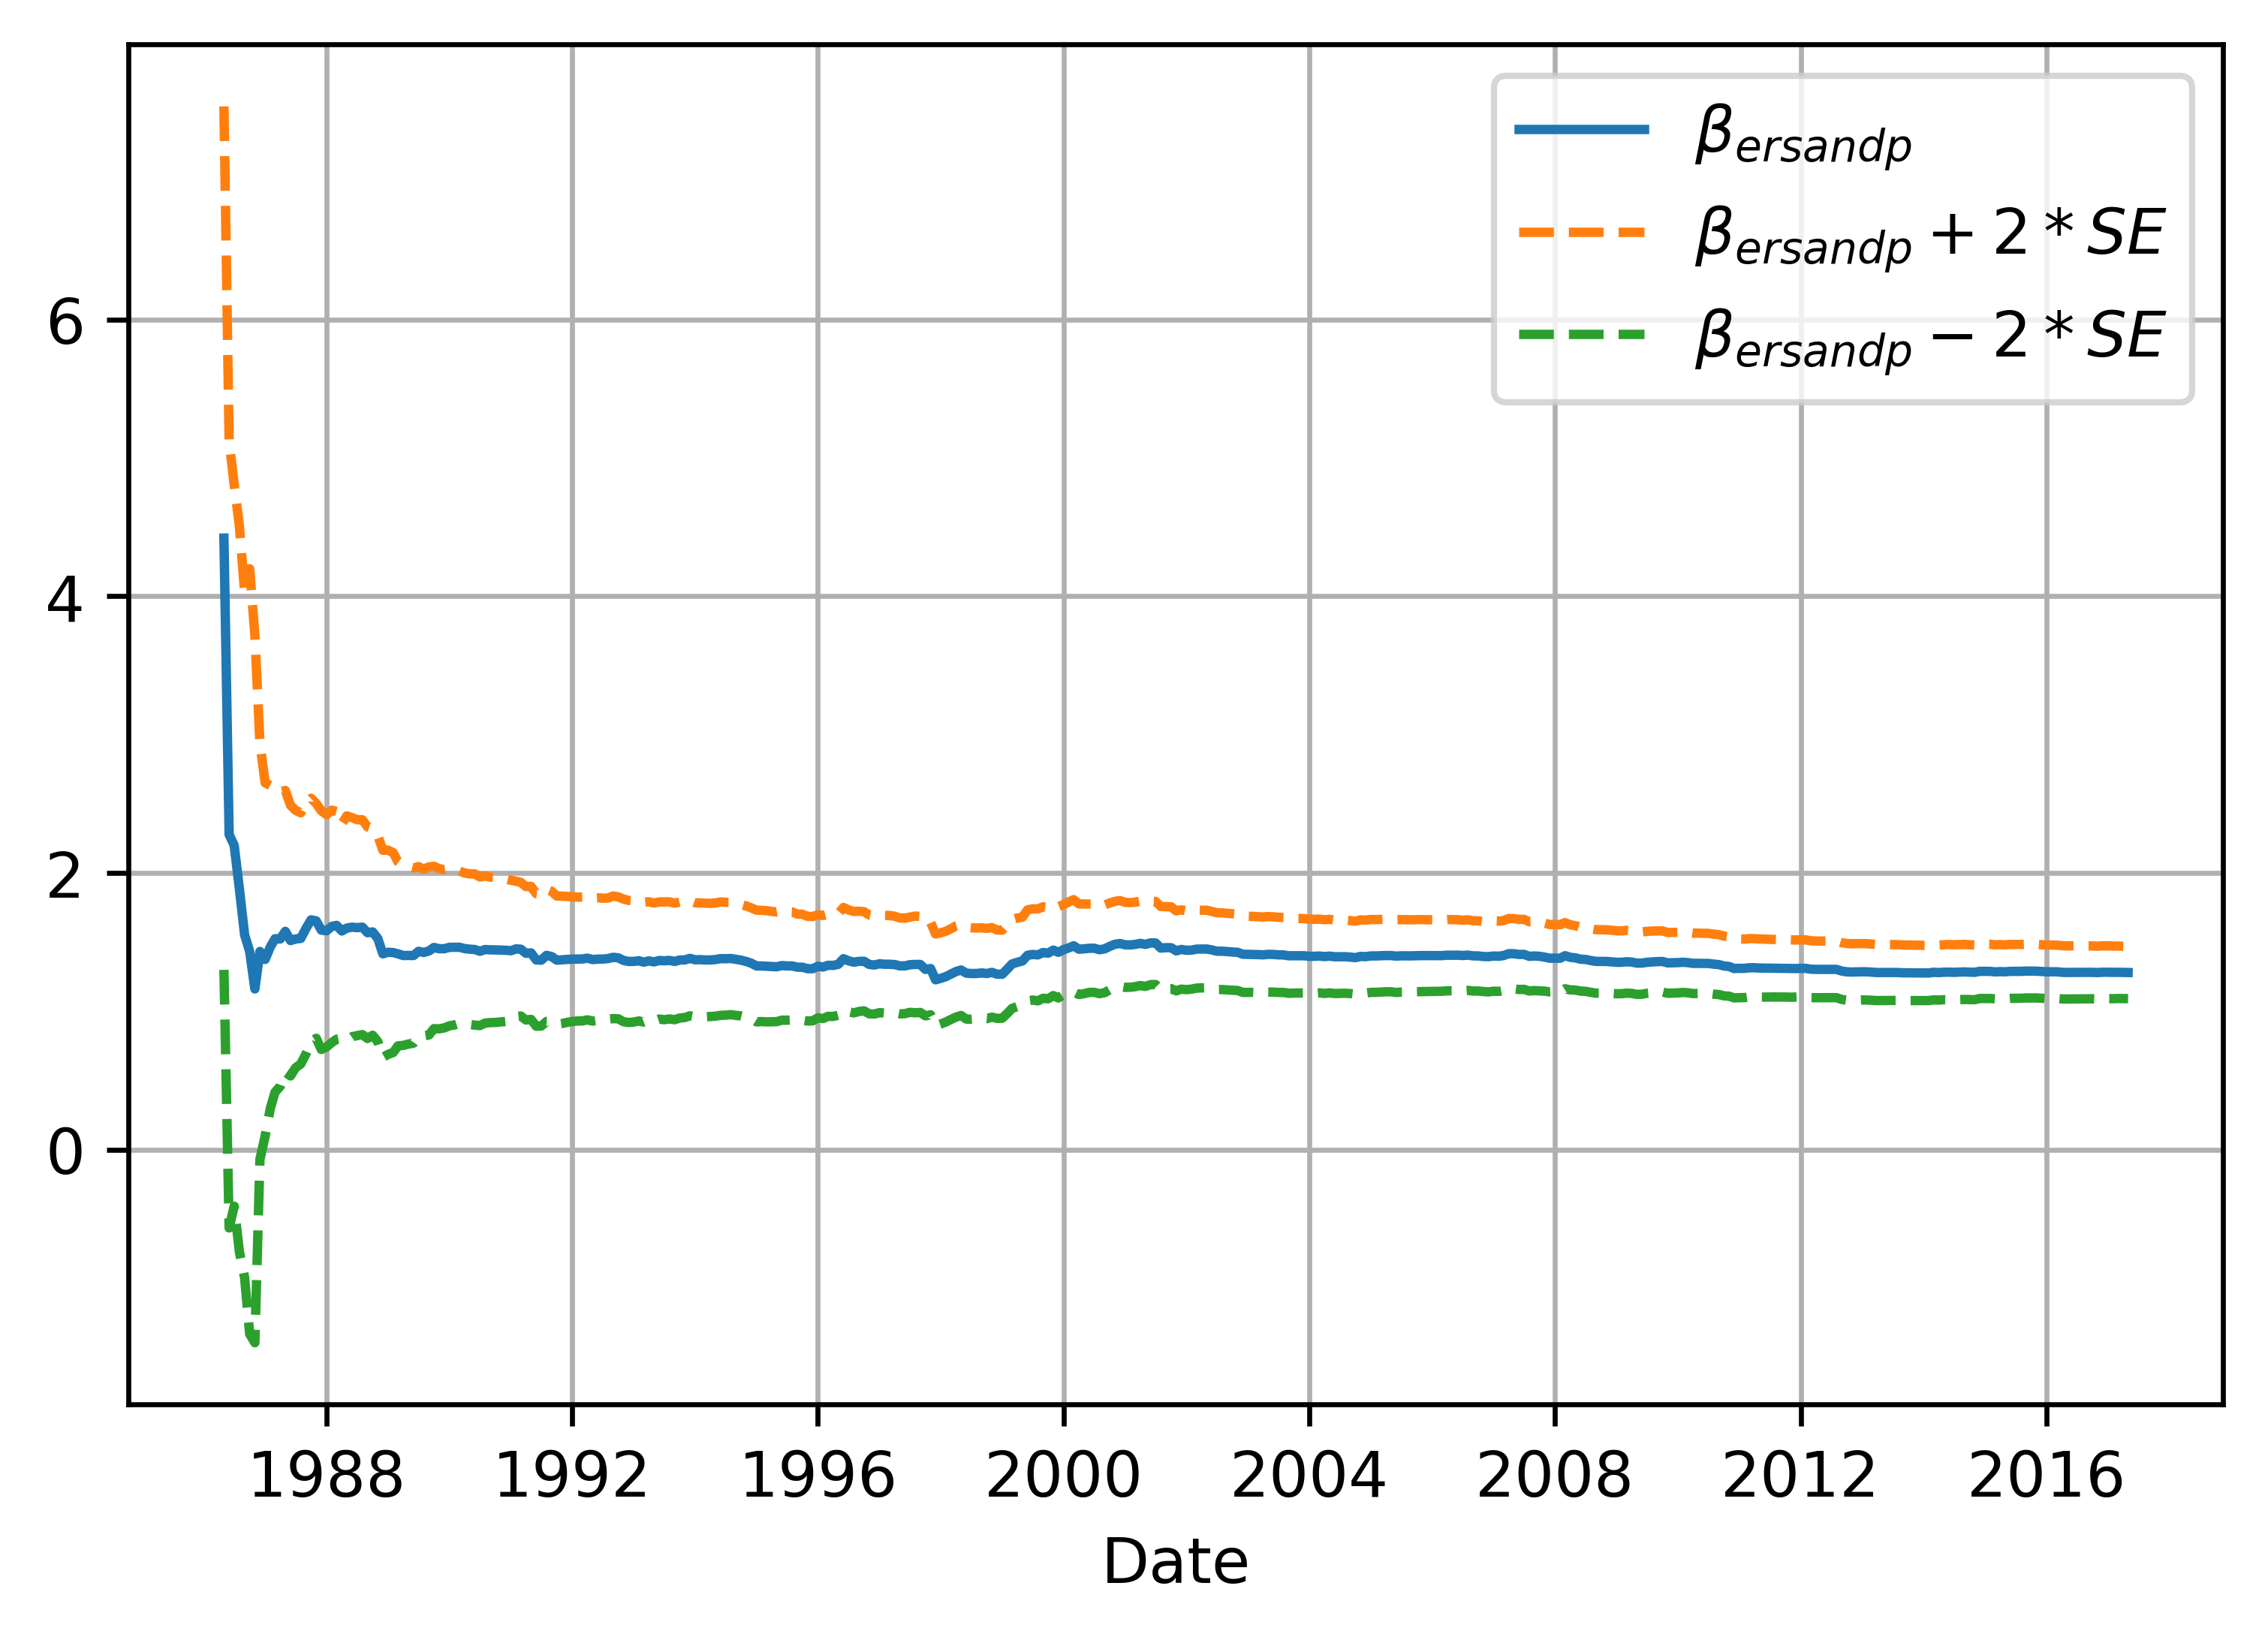

In [14]:
plt.figure(1, dpi=600)
plt.plot(parameters['coeff'], label=r'$\beta_{ersandp}$')
plt.plot(parameters['ersandp + 2*se'], label=r'$\beta_{ersandp} + 2*SE$',         linestyle='dashed')
plt.plot(parameters['ersandp - 2*se'], label=r'$\beta_{ersandp} - 2*SE$',         linestyle='dashed')

plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

What do we observe from the graph? The coefficients of the first couple of subsamples seem to be
relatively unstable with large standard error bands while they seem to stabilise after a short period of
time as the sample size used for estimation grows. This pattern is to be expected as it takes some time
for the coefficients to stabilise since the first few sets are estimated using very small samples. Given
this, the parameter estimates are remarkably stable. We can repeat this process for the recursive
estimates of the other variables to see whether they show similar stability over time.
